# **VAIBHAV GOYAL(18BME0708)**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('database.csv', low_memory = False)
data.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape

(174104, 66)

In [14]:
data.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

# Re-and removing na values

In [15]:
data = pd.read_csv('database.csv', low_memory = False, na_values = ['unknown', 'unk'],
                  na_filter = True, skip_blank_lines = True)

In [16]:
operator_counts = data.Operator.value_counts()
print(operator_counts)

UNKNOWN                    39540
BUSINESS                   14271
SOUTHWEST AIRLINES         13864
UNITED AIRLINES            13207
AMERICAN AIRLINES          10358
                           ...  
EAST COAST AIRLINES            1
ROYAL JET                      1
AIR LIBERTE                    1
BOMBARDIER BUSINESS JET        1
INTL AIR SERVICE               1
Name: Operator, Length: 533, dtype: int64


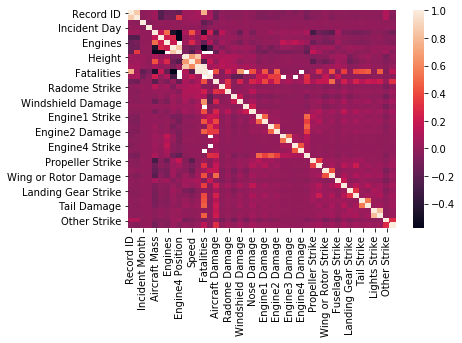

In [17]:
corr = data.corr()
heatmap = sns.heatmap(corr)

Text(0, 0.5, 'Damage frequency')

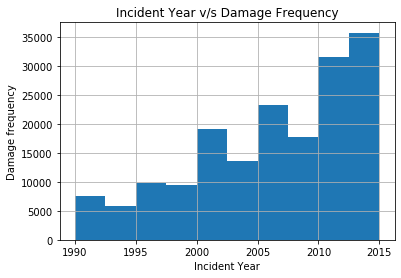

In [10]:
data["Incident Year"].hist()
plt.title('Incident Year v/s Damage Frequency')
plt.xlabel("Incident Year")
plt.ylabel("Damage frequency")

dataset['Incident Year'].value_counts(ascending = True).plot.bar()
plt.xlabel("Incident Year", fontsize=20)
plt.ylabel("Total No of Birdstrikes", fontsize=20)
plt.title("Birdstrikes per Year", fontsize=20)

### It can be observed that the frequency increases year by year

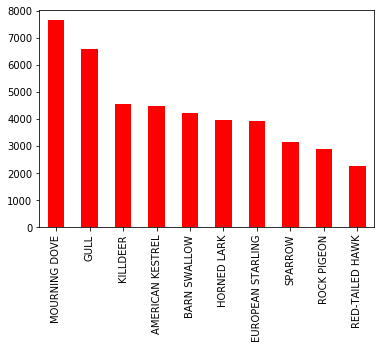

In [19]:
species_name = (data[~data['Species Name'].isin(['UNKNOWN MEDIUM BIRD', 'UNKNOWN SMALL BIRD','UNKNOWN LARGE BIRD', 'UNKNOWN BIRD'])])                             
species_name['Species Name'].value_counts().head(10).plot.bar(color = 'r')

### Morning dove caused most accidents

In [21]:
X = pd.DataFrame(data.iloc[:,56:66])
col = list(X.columns)
X = pd.DataFrame(X.apply(pd.Series.value_counts), columns=col)
print(X)

   Fuselage Strike  Fuselage Damage  Landing Gear Strike  Landing Gear Damage  \
0           156223           173280               166053               173092   
1            17881              824                 8051                 1012   

   Tail Strike  Tail Damage  Lights Strike  Lights Damage  Other Strike  \
0       172148       173377         173066         173370        158308   
1         1956          727           1038            734         15796   

   Other Damage  
0        172539  
1          1565  


### Fuselage was hit the most by birds

In [23]:
#Dropping some columns
data.drop(['Engine4 Position', 'Incident Year', 'Distance'], axis = 1)

,Record ID,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,...,0,0,0,0,1,1,0,0,0,0
1,129779,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,...,0,0,0,0,0,0,0,0,1,0
2,129780,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,...,0,0,0,0,0,0,0,0,0,0
4,2257,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,...,0,0,0,0,0,0,0,0,0,0
174100,365902,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,...,0,0,0,0,0,0,0,0,0,0
174101,365903,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,...,1,1,0,0,0,0,0,0,0,0
174102,366046,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,...,1,0,0,0,0,0,0,0,0,0


# Looking at some statistics of data

In [24]:
data.describe()

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,...,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,241204.036915,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,...,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,94013.682213,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,...,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1000.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205411.750000,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249102.500000,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,322592.250000,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367445.000000,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

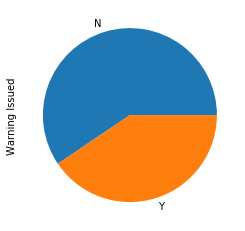

In [28]:
warning_column = data[data['Warning Issued'].isin(['y','n','Y','N'])] ['Warning Issued']
warning_column.map(lambda x: x.upper()).value_counts(ascending = False).head(10).plot.pie()
plt.xticks(rotation=360)

### No warning issued to most of the flights